In [2]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Reading the dataset as DataFrame

data = pd.read_csv("/content/AirPassengers.csv", index_col=0, parse_dates=True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


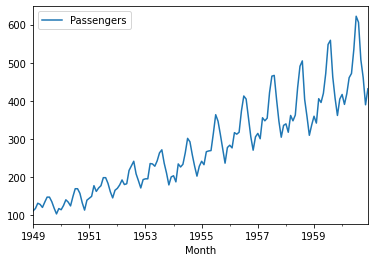

In [8]:
data.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


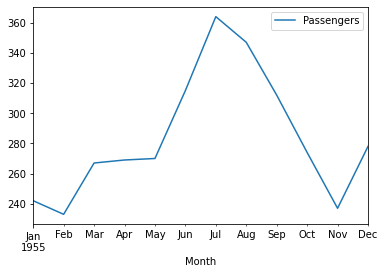

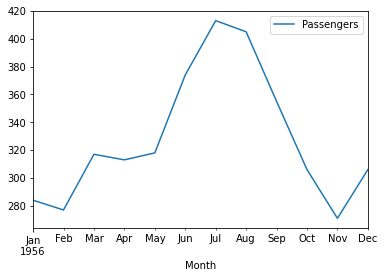

In [9]:
data["1955"].plot()
data["1956"].plot()

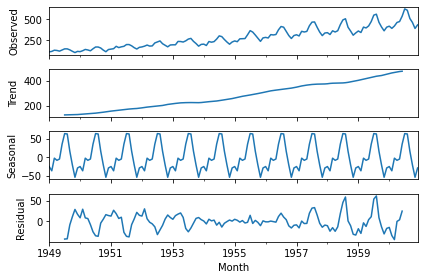

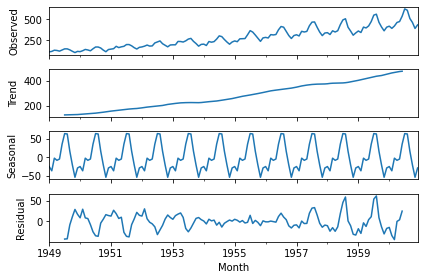

In [10]:
# To decompose the season and noise

from statsmodels.tsa.seasonal import seasonal_decompose

decompose_seasonal = seasonal_decompose(data, model="additive")
decompose_seasonal.plot()

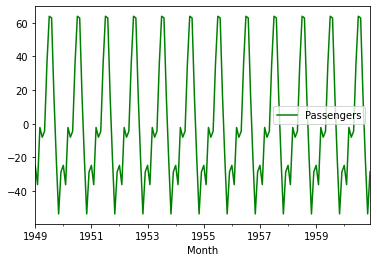

In [14]:
seasonality = decompose_seasonal.seasonal
seasonality.plot(color="green")

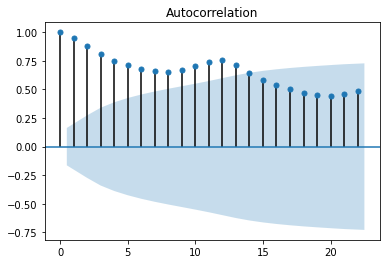

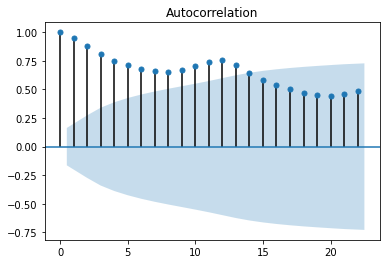

In [19]:
# Checking the uniformity by plottting auto_correlation factor

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [25]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data.Passengers, autolag="AIC")
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  0.8153688792060472
2. P-Value :  0.991880243437641
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


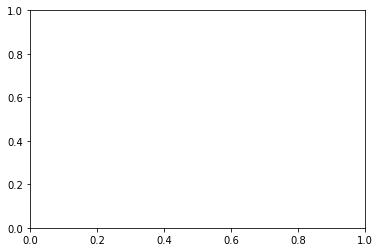

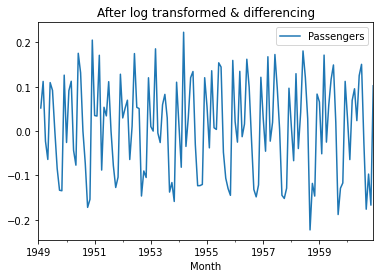

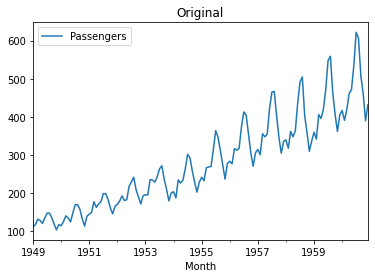

In [26]:
log_passengers = pd.DataFrame(data.Passengers.apply(lambda x: np.log(x)))
log_diff = log_passengers - log_passengers.shift()
ax1 = plt.subplot()
log_diff.plot(title="After log transformed & differencing")
ax2 = plt.subplot()
data.plot(title="Original")

In [29]:
print(log_diff)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
...                ...
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279

[144 rows x 1 columns]


In [32]:
test = adfuller(log_diff.dropna().Passengers)

print("P value: ", test[1])

P value:  0.0711205481508595


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


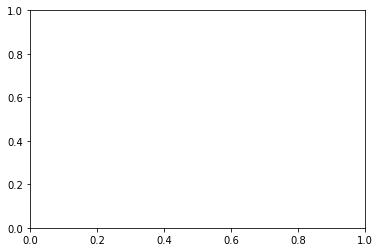

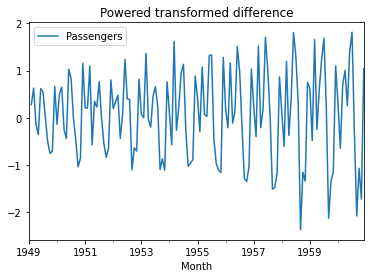

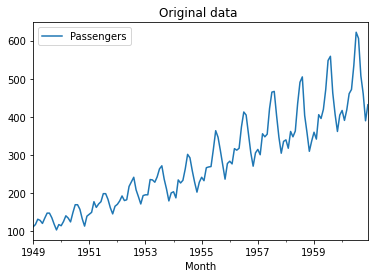

In [34]:
powered_transformed = pd.DataFrame(data.Passengers.apply(lambda x: x ** 0.5))
powered_transformed_diff = powered_transformed - powered_transformed.shift()

ax1 = plt.subplot()
powered_transformed_diff.plot(title="Powered transformed difference")
ax2 = plt.subplot()
data.plot(title="Original data ")

In [37]:
test = adfuller(powered_transformed_diff.dropna().Passengers)
print("P value: ", test[1])

P value:  0.02078418557126792


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


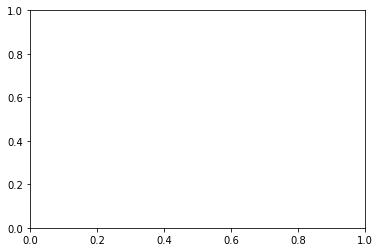

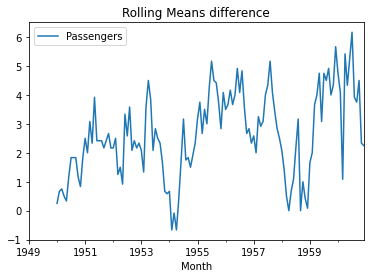

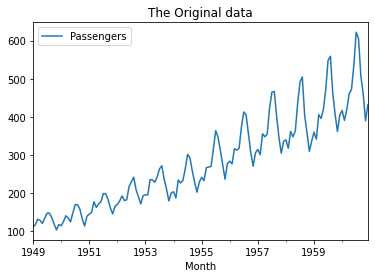

In [39]:
rolling_mean = data.rolling(window=12).mean()

rolling_mean_diff = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
rolling_mean_diff.plot(title="Rolling Means difference")
ax2 = plt.subplot()
data.plot(title="The Original data")

In [41]:
test = adfuller(rolling_mean_diff.dropna().Passengers)
print("P value: ", test[1])

P value:  0.011551493085515055


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


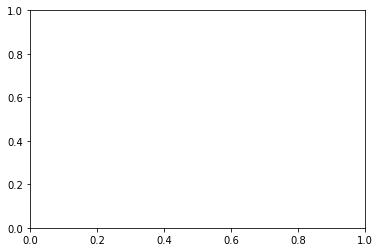

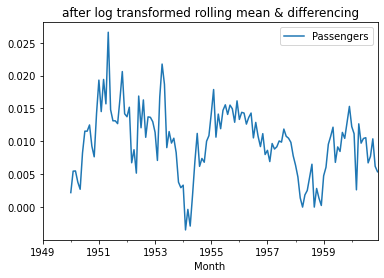

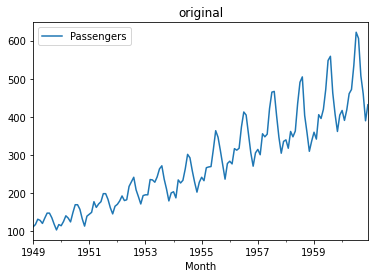

In [42]:
logged_transform = pd.DataFrame(data.Passengers.apply(lambda x : np.log(x)))

rolling_mean = logged_transform.rolling(window = 12).mean()

diff = rolling_mean - rolling_mean.shift()

ax1 = plt.subplot()
diff.plot(title='after log transformed rolling mean & differencing');
ax2 = plt.subplot()
data.plot(title='original')

In [43]:
test = adfuller(diff.dropna().Passengers)

print("p-value :", test[1])

p-value : 0.07239567181769493


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


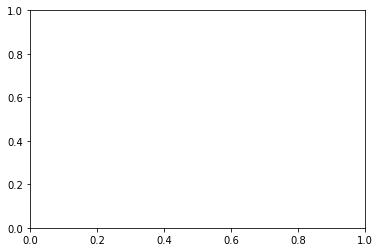

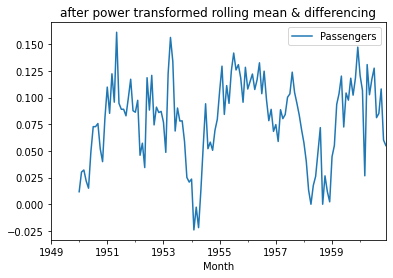

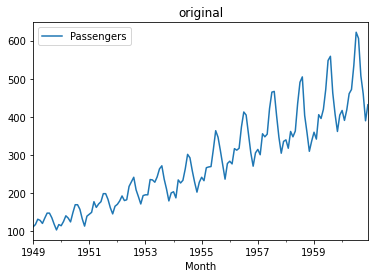

In [44]:
powered_transform = pd.DataFrame(data.Passengers.apply(lambda x :  x ** 0.5))

rolling_mean = powered_transform.rolling(window = 12).mean()

diff = rolling_mean - rolling_mean.shift(1)
ax1 = plt.subplot()
diff.plot(title='after power transformed rolling mean & differencing');
ax2 = plt.subplot()
data.plot(title='original')

In [45]:
test = adfuller(diff.dropna().Passengers)

print("p-value :", test[1])

p-value : 0.0032766103265214164
